<a href="https://colab.research.google.com/github/saswata121924/Google-Trends-Data-analysis/blob/main/Google_trends_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**

Google Trends gives us an estimate of search volume. Perhaps there are patterns in Google's search volume and the price of Bitcoin or a hot stock like Tesla.

Data Sources: <br>
<ul>
<li> <a href="https://fred.stlouisfed.org/series/UNRATE/">Unemployment Rate from FRED</a></li>
<li> <a href="https://trends.google.com/trends/explore">Google Trends</a> </li>  
<li> <a href="https://finance.yahoo.com/quote/TSLA/history?p=TSLA">Yahoo Finance for Tesla Stock Price</a> </li>    
<li> <a href="https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD">Yahoo Finance for Bitcoin Stock Price</a> </li>
</ul>

In [11]:
import pandas as pd
df_unemployment = pd.read_csv("data/UE Benefits Search vs UE Rate 2004-19.csv")
print(df_unemployment.shape)
print(f"Largest value for Unemployment Benefits in Web Search: {df_unemployment.UE_BENEFITS_WEB_SEARCH.max()}")
df_unemployment.head()

(181, 3)
Largest value for Unemployment Benefits in Web Search: 100


,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01,34,5.7
1,2004-02,33,5.6
2,2004-03,25,5.8
3,2004-04,29,5.6
4,2004-05,23,5.6


In [4]:
df_tesla = pd.read_csv("data/TESLA Search Trend vs Price.csv")
df_tesla.head()

,MONTH,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
0,2010-06-01,3,4.766
1,2010-07-01,3,3.988
2,2010-08-01,2,3.896
3,2010-09-01,2,4.082
4,2010-10-01,2,4.368


In [15]:
print(df_tesla.shape)
print(f"Largest value for Tesla in Web Search: {df_tesla.TSLA_WEB_SEARCH.max()}")
df_tesla.describe()

(124, 3)
Largest value for Tesla in Web Search: 31


,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
count,124.000000,124.000000
mean,8.725806,50.962145
std,5.870332,65.908389
min,2.000000,3.896000
25%,3.750000,7.352500
50%,8.000000,44.653000
75%,12.000000,58.991999
max,31.000000,498.320007


In [16]:
df_bitcoin_search = pd.read_csv("data/Bitcoin Search Trend.csv")
print(df_bitcoin_search.shape)
print(f"Largest value for Bitcoin Search: {df_bitcoin_search.BTC_NEWS_SEARCH.max()}")
df_bitcoin_search.head()

(73, 2)
Largest value for Bitcoin Search: 100


,MONTH,BTC_NEWS_SEARCH
0,2014-09,5
1,2014-10,4
2,2014-11,4
3,2014-12,4
4,2015-01,5


In [41]:
df_bitcoin_price = pd.read_csv("data/Daily Bitcoin Price.csv")
print(df_bitcoin_price.shape)
df_bitcoin_price.head()

(2204, 3)


,DATE,CLOSE,VOLUME
0,2014-09-17,457.334015,21056800.0
1,2014-09-18,424.440002,34483200.0
2,2014-09-19,394.795990,37919700.0
3,2014-09-20,408.903992,36863600.0
4,2014-09-21,398.821014,26580100.0


## **What do the Search Numbers mean?**

##### Google defines the values of search interest as:<br>

> Numbers represent search interest relatie to the highest point on the chart for the given region and time. A value of 100 is the peak popularity for the term. A value of 50 means that the term is half as popular. A score of 0 means there was not enough data for this term.

<p>Basically, the actual search volume of a term is not publicly available. Google ony offers a scaled number. Each data point is divided by the total searches of the geography and time ranges it represents to compare relative popularity.</p><br>
<p>For each word in the search, Google finds how much search volume in each and time period your term had relative to all the searches in that region and time period. It then combines all of these measures into a single measure of popularity, and then it scaes the values across your topics, so the largest measures is set to 100. In short: Google Trends doesn't exactly tell how many searches occurred for the topic searched, but it does give a nice proxy.</p>


### **Data Cleaning**

In [18]:
df_unemployment.isna().values.any()

False

In [19]:
df_tesla.isna().values.any()

False

In [42]:
df_bitcoin_price.isna().values.any()

True

In [43]:
df_bitcoin_price[df_bitcoin_price["CLOSE"].isna()]

,DATE,CLOSE,VOLUME
2148,2020-08-04,NaN,NaN


In [44]:
df_bitcoin_price = df_bitcoin_price.dropna()

In [45]:
df_bitcoin_price.isna().values.any()

False

In [30]:
df_bitcoin_search.isna().values.any()

False

Removed missing and junk values in our DataFrame<hr>

**Convert String to DataTime Objects**

In [32]:
type(df_tesla['MONTH'][0])

str

In [33]:
df_tesla['MONTH'] = pd.to_datetime(df_tesla['MONTH'])
df_tesla['MONTH'].head()

0   2010-06-01
1   2010-07-01
2   2010-08-01
3   2010-09-01
4   2010-10-01
Name: MONTH, dtype: datetime64[ns]

In [34]:
print(type(df_unemployment['MONTH'][0]))
df_unemployment['MONTH'] = pd.to_datetime(df_unemployment['MONTH'])
df_unemployment['MONTH'].head()

<class 'str'>


0   2004-01-01
1   2004-02-01
2   2004-03-01
3   2004-04-01
4   2004-05-01
Name: MONTH, dtype: datetime64[ns]

In [35]:
print(type(df_bitcoin_search['MONTH'][0]))
df_bitcoin_search['MONTH'] = pd.to_datetime(df_bitcoin_search['MONTH'])
df_bitcoin_search['MONTH'].head()

<class 'str'>


0   2014-09-01
1   2014-10-01
2   2014-11-01
3   2014-12-01
4   2015-01-01
Name: MONTH, dtype: datetime64[ns]

In [46]:
print(type(df_bitcoin_price['DATE'][0]))
df_bitcoin_price['DATE'] = pd.to_datetime(df_bitcoin_price['DATE'])
df_bitcoin_price['DATE'].head()

<class 'str'>


0   2014-09-17
1   2014-09-18
2   2014-09-19
3   2014-09-20
4   2014-09-21
Name: DATE, dtype: datetime64[ns]

<hr>

**Converting from Daily to Monthly Data for Bitcoin price DataFrame**


In [47]:
df_bitcoin_price_monthly = df_bitcoin_price.resample('M', on='DATE').last()
df_bitcoin_price_monthly.head()

,CLOSE,VOLUME
DATE,,
2014-09-30,386.944000,34707300.0
2014-10-31,338.321014,12545400.0
2014-11-30,378.046997,9194440.0
2014-12-31,320.192993,13942900.0
2015-01-31,217.464005,23348200.0


<hr>

**Plotting Tesla Search Trend vs Stock price**

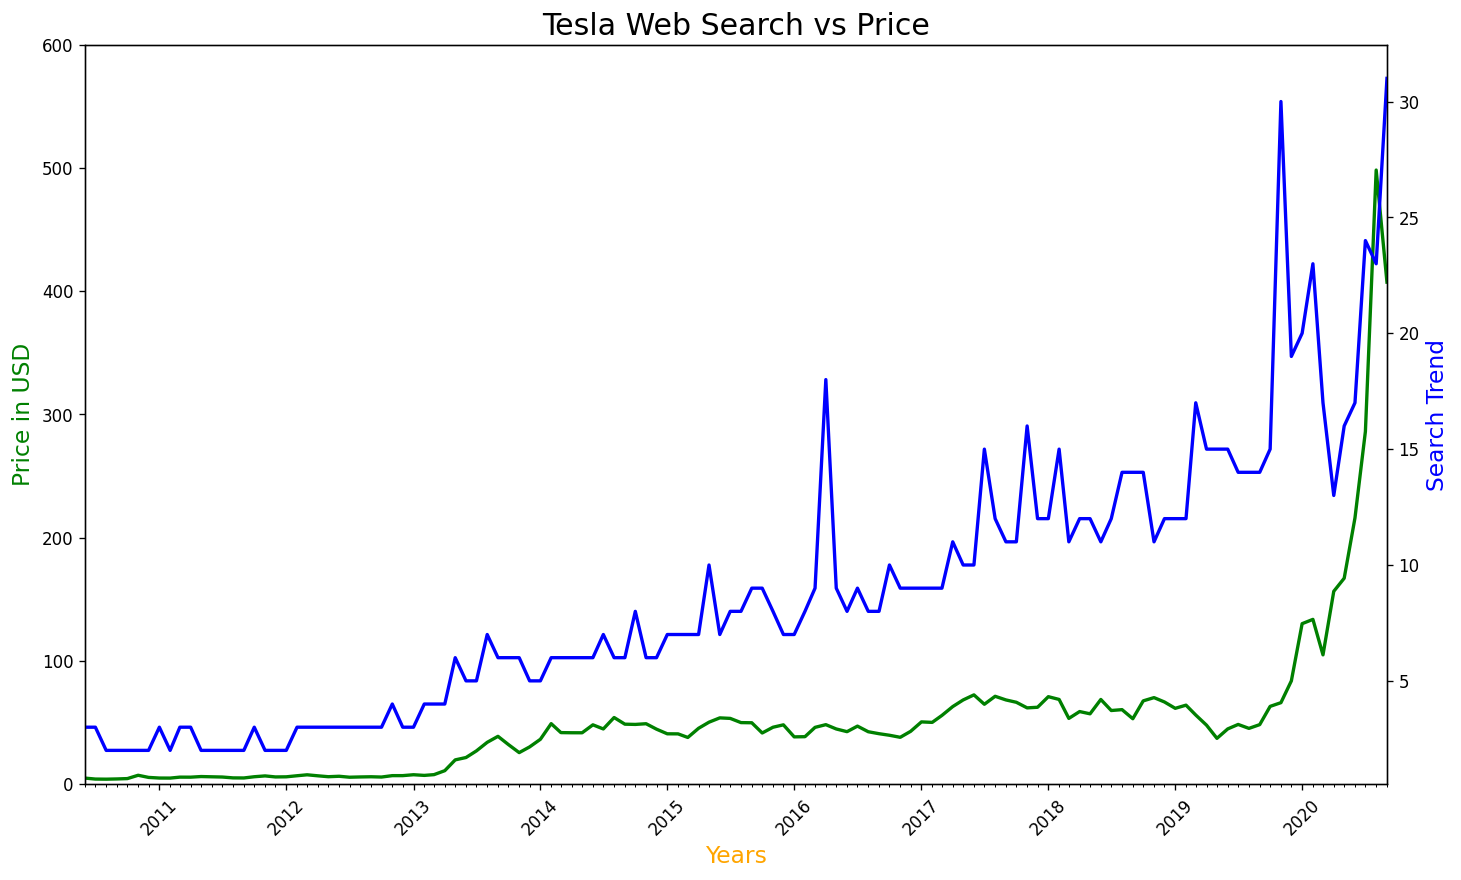

In [77]:
import matplotlib.pyplot as plt
import matplotlib.dates as md
years = md.YearLocator()
months = md.MonthLocator()
years_format = md.DateFormatter("%Y")
plt.figure(figsize=(14,8), dpi=120)
plt.xticks(rotation=45)
plt.title("Tesla Web Search vs Price", fontsize=18)
ax1 = plt.gca()
ax1.set_ylabel("Price in USD", fontsize=14, color="green")
ax1.set_xlabel("Years", fontsize=14, color="orange")
ax1.set_xlim(df_tesla['MONTH'].min(), df_tesla['MONTH'].max())
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_format)
ax1.xaxis.set_minor_locator(months)
ax1.set_ylim(0, 600)
ax2 = ax1.twinx()
ax2.set_ylabel("Search Trend", fontsize=14, color="blue")
ax1.plot(df_tesla['MONTH'], df_tesla['TSLA_USD_CLOSE'], 'g', linewidth=2)
ax2.plot(df_tesla['MONTH'], df_tesla['TSLA_WEB_SEARCH'], 'b', linewidth=2)

<hr>

**Plotting Bitcoin News Search vs Price**

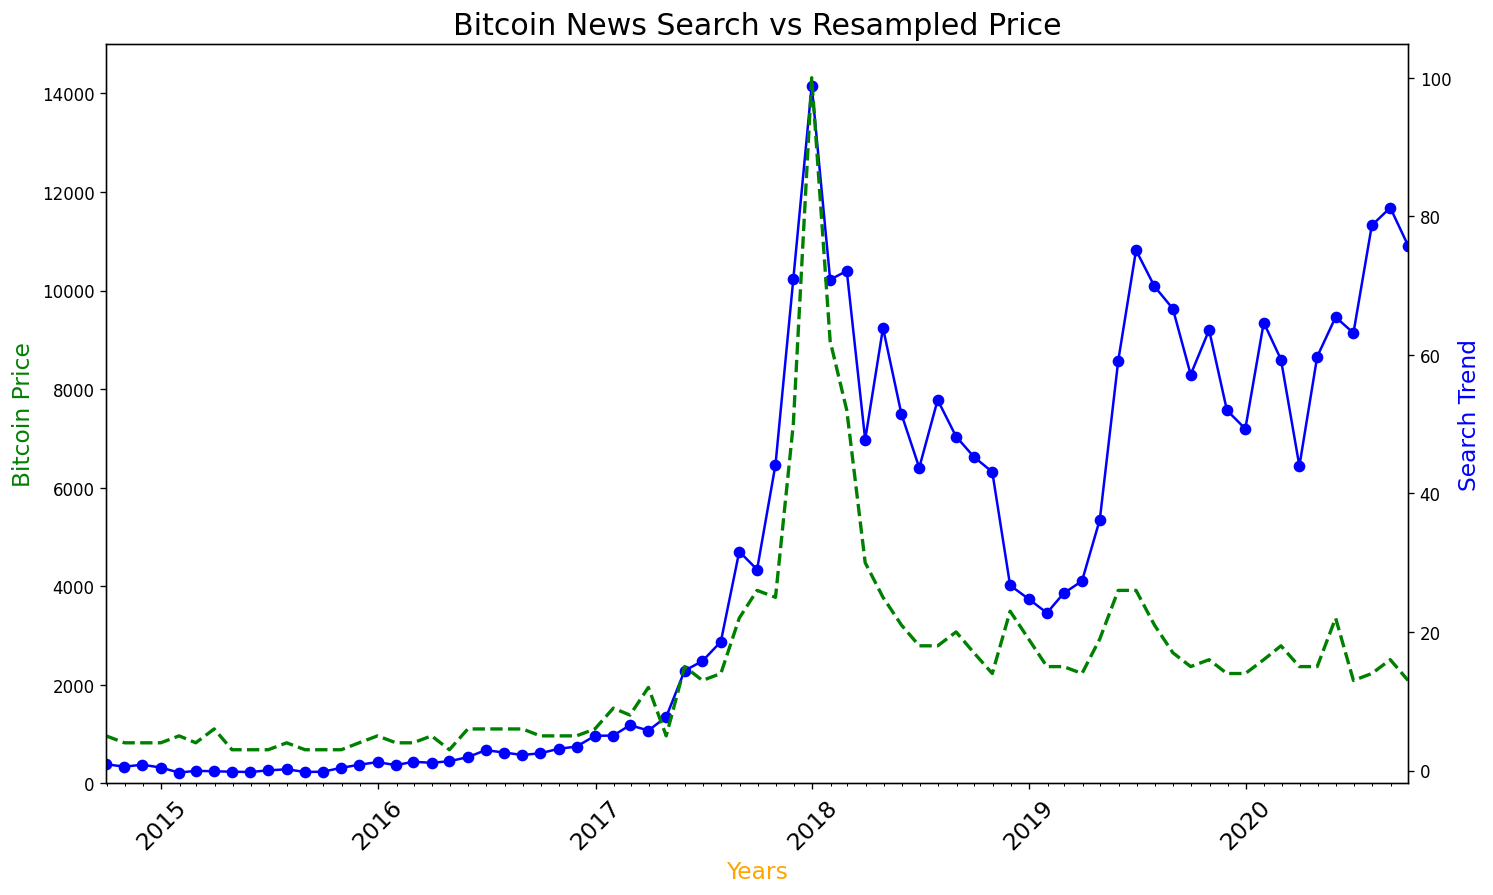

In [88]:
plt.figure(figsize=(14,8), dpi=120)
plt.title("Bitcoin News Search vs Price", fontsize=18)
plt.xticks(fontsize=14, rotation=45)
ax1 = plt.gca()
ax1.set_xlabel("Years", fontsize=14, color="Orange")
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_format)
ax1.xaxis.set_minor_locator(months)
ax1.set_ylabel("Bitcoin Price", fontsize=14, color="Green")
ax1.set_xlim(df_bitcoin_price_monthly.index.min(), df_bitcoin_price_monthly.index.max())
ax1.set_ylim(0, 15000)
ax2 = ax1.twinx()
ax2.set_ylabel("Search Trend", fontsize=14, color="Blue")
ax2.plot(df_bitcoin_price_monthly.index, df_bitcoin_search["BTC_NEWS_SEARCH"], "g", linewidth = 2, linestyle="--")
ax1.plot(df_bitcoin_price_monthly.index,df_bitcoin_price_monthly["CLOSE"], "b", marker="o")

<hr>

**Plotting Monthly search of 'Unemployment Benefits' in the U.S. vs the U/E Rate**

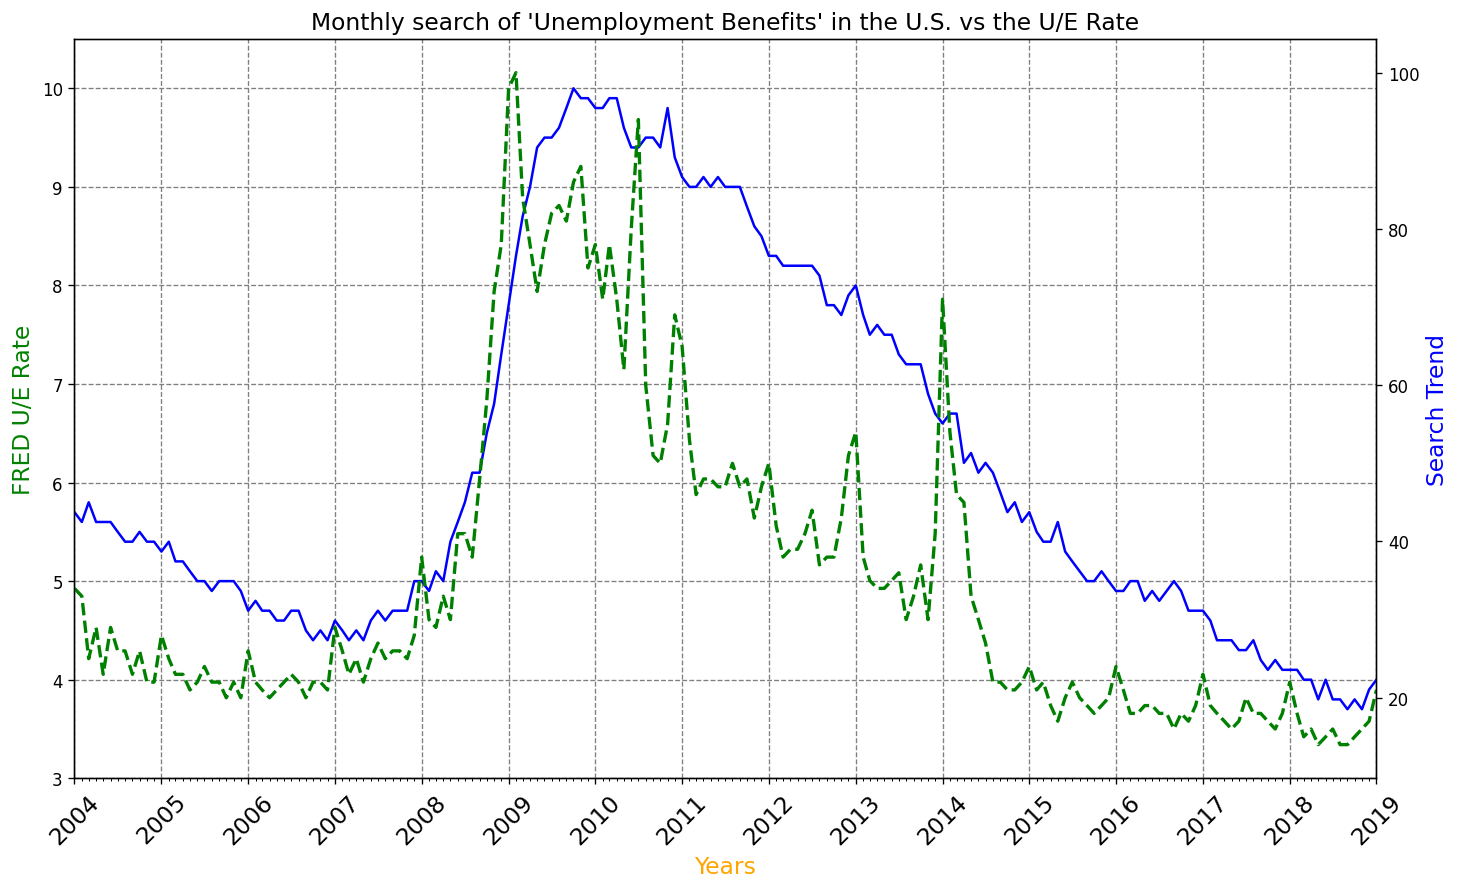

In [100]:
plt.figure(figsize=(14,8), dpi=120,)
plt.title("Monthly search of 'Unemployment Benefits' in the U.S. vs the U/E Rate", fontsize=14)
plt.xticks(fontsize=14, rotation=45)
ax1 = plt.gca()
ax1.set_xlabel("Years", fontsize=14, color="Orange")
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_format)
df_unemployment.UE_BENEFITS_WEB_SEARCH
ax1.xaxis.set_minor_locator(months)
ax1.set_ylabel("FRED U/E Rate", fontsize=14, color="Green")
ax1.set_xlim(df_unemployment['MONTH'].min(), df_unemployment['MONTH'].max())
ax1.set_ylim(3,10.5)
ax1.grid(color="grey", linestyle='--')
ax2 = ax1.twinx()
ax2.set_ylabel("Search Trend", fontsize=14, color="Blue")
ax2.plot(df_unemployment['MONTH'], df_unemployment["UE_BENEFITS_WEB_SEARCH"], "g", linewidth = 2, linestyle="--")
ax1.plot(df_unemployment['MONTH'], df_unemployment["UNRATE"], "b")

<hr>

**Plotting Monthly search of 'Unemployment Benefits' in the U.S. vs the U/E Rate - Latest data (2020)**

In [102]:
df_unemployment_latest = pd.read_csv("data/UE Benefits Search vs UE Rate 2004-20.csv")
df_unemployment_latest.head()

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01,9,5.7
1,2004-02,8,5.6
2,2004-03,7,5.8
3,2004-04,8,5.6
4,2004-05,6,5.6


In [103]:
df_unemployment_latest.isna().values.any()

False

In [106]:
df_unemployment_latest["MONTH"] = pd.to_datetime(df_unemployment_latest["MONTH"])
df_unemployment_latest["MONTH"].head()

0   2004-01-01
1   2004-02-01
2   2004-03-01
3   2004-04-01
4   2004-05-01
Name: MONTH, dtype: datetime64[ns]

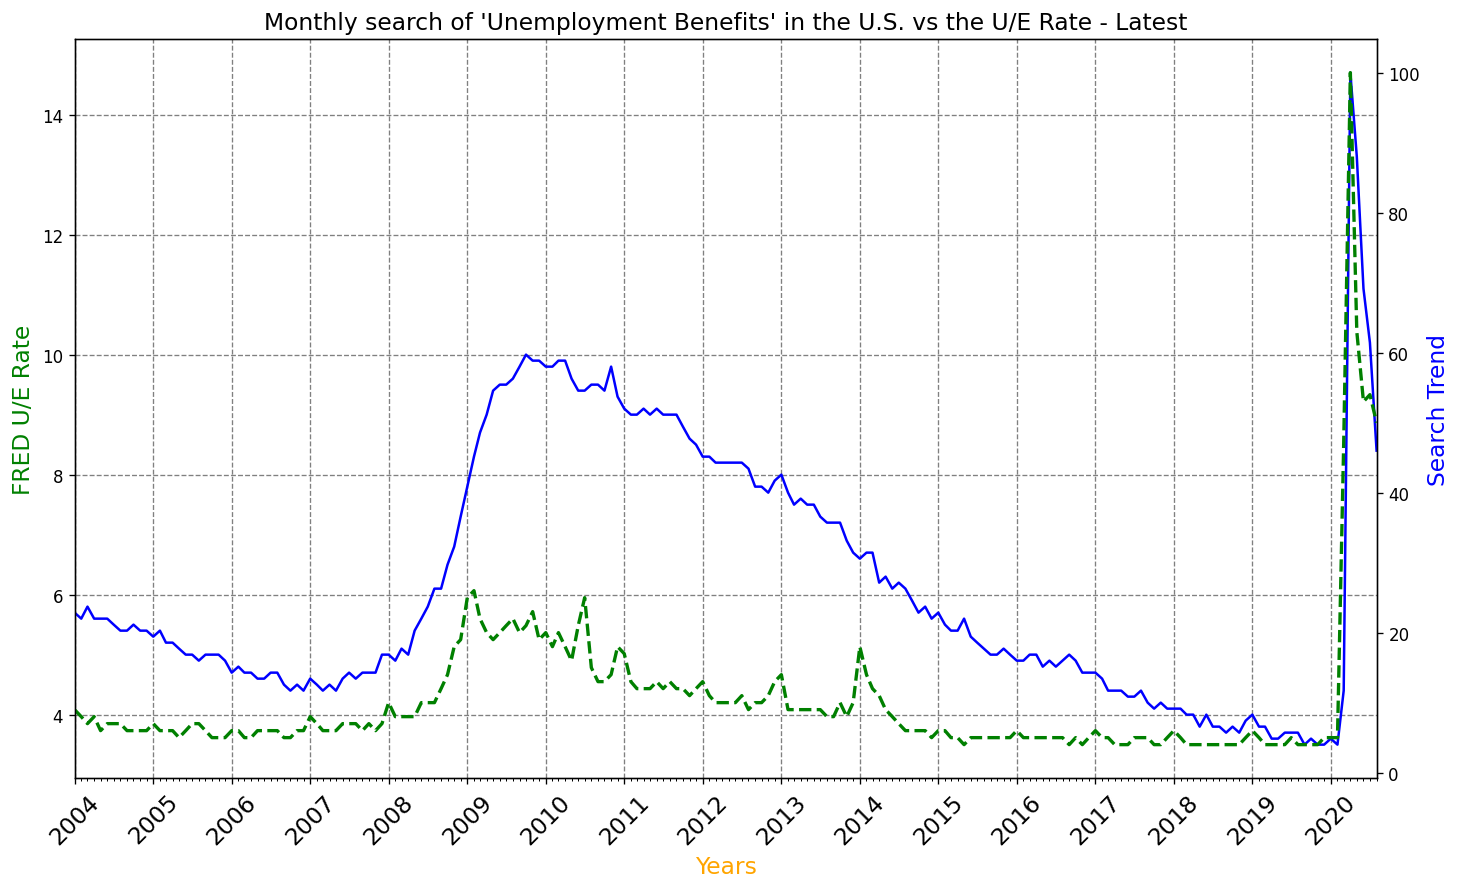

In [108]:
plt.figure(figsize=(14,8), dpi=120,)
plt.title("Monthly search of 'Unemployment Benefits' in the U.S. vs the U/E Rate - Latest", fontsize=14)
plt.xticks(fontsize=14, rotation=45)
ax1 = plt.gca()
ax1.set_xlabel("Years", fontsize=14, color="Orange")
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_format)
df_unemployment_latest.UE_BENEFITS_WEB_SEARCH
ax1.xaxis.set_minor_locator(months)
ax1.set_ylabel("FRED U/E Rate", fontsize=14, color="Green")
ax1.set_xlim(df_unemployment_latest['MONTH'].min(), df_unemployment_latest['MONTH'].max())
ax1.grid(color="grey", linestyle='--')
ax2 = ax1.twinx()
ax2.set_ylabel("Search Trend", fontsize=14, color="Blue")
ax2.plot(df_unemployment_latest['MONTH'], df_unemployment_latest["UE_BENEFITS_WEB_SEARCH"], "g", linewidth = 2, linestyle="--")
ax1.plot(df_unemployment_latest['MONTH'], df_unemployment_latest["UNRATE"], "b")